In [1]:
import pandas as pd
import numpy as np

import os
import os.path
import re
import string
import collections
import math
from collections import Counter
import random

frequentwords = ['a', 'all', 'also', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', 'do', 'down', 'even', 'every', 'for', 'from', 'had', 'has', 'have', 'her', 'his', 'if', 'in', 'into', 'is', 'it', 'its', 'may', 'more', 'must', 'my', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'our', 'shall', 'should', 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'then', 'there', 'things', 'this', 'to', 'up', 'upon', 'was', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'would', 'your']


In [2]:
path = '../data/Raw/blogs/blogs/'
files = os.listdir(path)
files.sort() 

first100 = files[:100]

df = pd.read_csv('../data/Processed/dataframe_2.csv')
df = df.sort_values('total_words', ascending = False)

In [33]:
def get_train_test_sample(df,train_n,test_n,take):
    target = train_n+test_n
    temp = df[df['total_words'] >= target].head(take)
    train_vecs = [] 
    test_vecs = [] 
    ids = []
    for i in temp.iterrows():
        words = i[1][-1] - i[1][-2]
 
        random_words =random.sample([i for i in range(0,words)],train_n)

        trvec = [] 
        prev_len = 0
        for x in i[1].index:
            if np.isin(x,frequentwords) == True:
                size = i[1][x]
                count = [i for i in random_words if prev_len <= i < prev_len + size ]
                prev_len = size
                trvec.append(len(count))

        random_words = random.sample(list(range(0,words)),test_n)

        tevec = [] 
        prev_len = 0
        for x in i[1].index:
            if np.isin(x,frequentwords) == True:
                size = i[1][x]
                count = [i for i in random_words if prev_len <= i < prev_len + size ]
                prev_len = size
                tevec.append(len(count))

        ids.append(i[1][0])
        test_vecs.append(tevec)
        train_vecs.append(trvec)
    return([ids,test_vecs,train_vecs])


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr_l1_accuracy = []
lr_l2_accuracy = []
xtrains = []
xtests = []
ys = [] 

for i in range (2,100):
    print(i)
    ids,test,train = get_train_test_sample(df,5000,1000,i)

    X_test = pd.DataFrame(test)
    X_train = pd.DataFrame(train)
    y = ids

    xtrains.append(X_train)
    xtests.append(X_test)
    ys.append(y)

    model = LogisticRegression(solver = 'saga',penalty = 'l1')

    model.fit(X_train,y)
    predictions = model.predict(X_test)
    lr_l1_accuracy.append(sum(np.where(y-predictions == 0,1,0))/len(predictions))

    model = LogisticRegression(solver = 'saga',penalty = 'l2')
    model.fit(X_train,y)
    predictions = model.predict(X_test)
    lr_l2_accuracy.append(sum(np.where(y-predictions == 0,1,0))/len(predictions))

### varying number of authors (l1 and l2)

### plotting number of authors, l1 and l2

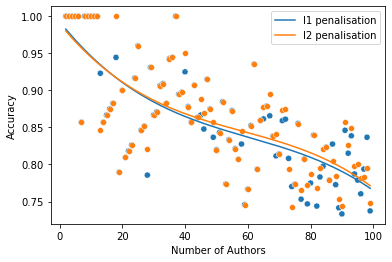

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline
k = [x for x in range(2,100)]
data_plotting = pd.DataFrame({'k' : k,'l1' : lr_l1_accuracy,'l2':lr_l2_accuracy})

fig,ax = plt.subplots()
sns.scatterplot(data = data_plotting,x='k',y='l1',linestyle = 'dashed',ax = ax, palette = 'coolwarm')
g = sns.scatterplot(data = data_plotting,x='k',y='l2',ax = ax, legend = True, palette = 'coolwarm')
spline_l1 = UnivariateSpline(data_plotting['k'],data_plotting['l1'])
spline_l2 = UnivariateSpline(data_plotting['k'],data_plotting['l2'])

space = np.linspace(min(data_plotting['k']),max(data_plotting['k']),1000)

plt.plot(space,spline_l1(space))
plt.plot(space,spline_l2(space))
#plt.plot()

ax.set_xlabel('Number of Authors')
ax.set_ylabel('Accuracy')
ax.legend(['l1 penalisation','l2 penalisation'])